In [1]:
import numpy as np
import pandas as pd
import talib
import yfinance as yf
import random
random.seed(42)

In [2]:
price = yf.download('SBIN.NS', start = '2017-11-01', end = '2023-11-01', auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [3]:
price

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-01,296.104690,307.636904,296.104690,306.105652,34907283
2017-11-02,306.249155,309.263790,300.076309,300.841949,23110527
2017-11-03,301.894720,313.426904,299.167182,311.034332,26898400
2017-11-06,309.694508,315.819486,307.636902,314.862457,17143407
2017-11-07,314.814606,317.446435,301.942559,303.569519,21883541
...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296


In [4]:
price['H-L'] = price['High'] - price['Low']
price['O-C'] = price['Close'] - price['Open']

price['3day MA'] = price['Close'].shift(1).rolling(window = 3).mean()
price['10day MA'] = price['Close'].shift(1).rolling(window = 10).mean()
price['30day MA'] = price['Close'].shift(1).rolling(window = 30).mean()

price['Std_dev'] = price['Close'].rolling(5).std()
price['RSI'] = talib.RSI(price['Close'].values, timeperiod = 9)
price['Williams %R'] = talib.WILLR(price['High'].values, price['Low'].values, price['Close'].values, 7)
price['Price_Rise'] = np.where(price['Close'].shift(-1) > price['Close'], 1, 0)

In [5]:
price

,Open,High,Low,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
Date,,,,,,,,,,,,,,
2017-11-01,296.104690,307.636904,296.104690,306.105652,34907283,11.532214,10.000962,NaN,NaN,NaN,NaN,NaN,NaN,0
2017-11-02,306.249155,309.263790,300.076309,300.841949,23110527,9.187480,-5.407206,NaN,NaN,NaN,NaN,NaN,NaN,1
2017-11-03,301.894720,313.426904,299.167182,311.034332,26898400,14.259722,9.139613,NaN,NaN,NaN,NaN,NaN,NaN,1
2017-11-06,309.694508,315.819486,307.636902,314.862457,17143407,8.182584,5.167949,305.993978,NaN,NaN,NaN,NaN,NaN,0
2017-11-07,314.814606,317.446435,301.942559,303.569519,21883541,15.503877,-11.245087,308.912913,NaN,NaN,5.660916,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624,7.200012,-2.399963,562.416667,575.420007,587.633337,8.766032,26.615323,-82.037962,0
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825,9.700012,-4.450012,557.416667,571.875006,586.725004,9.353501,21.744781,-89.659897,1
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296,12.500000,11.150024,552.050008,567.740009,585.235004,6.466120,40.564489,-50.207994,1


In [6]:
price = price.dropna()

In [7]:
price

,Open,High,Low,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
Date,,,,,,,,,,,,,,
2017-12-13,302.564604,305.244302,297.779461,299.837067,17540585,7.464841,-2.727538,303.043142,303.708276,310.255948,2.513823,40.565136,-62.185193,1
2017-12-14,300.794147,301.846884,296.200420,300.507050,13894451,5.646464,-0.287097,303.106934,302.215308,310.046995,2.618747,41.724982,-59.090786,0
2017-12-15,304.717935,305.627124,298.114443,298.832214,16050711,7.512681,-5.885721,301.703308,301.607599,310.035832,2.811573,39.554218,-75.000255,1
2017-12-18,294.764835,309.598779,287.491411,305.196442,32119915,22.107368,10.431607,299.725444,301.559747,309.629094,2.943662,50.551714,-19.913441,1
2017-12-19,305.722833,308.402502,304.717935,306.057770,14741481,3.684566,0.334937,301.511902,302.066971,309.306894,3.301049,51.884583,-16.017328,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624,7.200012,-2.399963,562.416667,575.420007,587.633337,8.766032,26.615323,-82.037962,0
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825,9.700012,-4.450012,557.416667,571.875006,586.725004,9.353501,21.744781,-89.659897,1
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296,12.500000,11.150024,552.050008,567.740009,585.235004,6.466120,40.564489,-50.207994,1


In [8]:
x = price.iloc[:, 4:-1]
y = price.iloc[:,-1]

In [9]:
split = int(len(price)*0.7)

In [10]:
x_train, x_test, y_train, y_test = x[:split], x[split:], y[:split],y[split:]

In [11]:
from sklearn.preprocessing import StandardScaler as sc

In [12]:
sc1 = sc()

In [13]:
x_train = sc1.fit_transform(x_train)
x_test = sc1.fit_transform(x_test)

/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import TensorBoard

2023-12-08 21:56:11.588880: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
classifier = Sequential()

In [16]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = x.shape[1]))

In [17]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

In [18]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [19]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________________________


In [22]:
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
102/102 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.8623
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.8653
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.8732
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.8850
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.8791
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.8761
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.8761
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.8741
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.8800
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.1001 - accura

102/102 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9440
Epoch 82/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9518
Epoch 83/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9597
Epoch 84/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9656
Epoch 85/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9666
Epoch 86/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9607
Epoch 87/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.9597
Epoch 88/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9607
Epoch 89/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.9715
Epoch 90/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 

In [23]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5)

14/14 [==============================] - 0s 1ms/step


In [24]:
price['y_pred'] = np.NaN
price.iloc[(len(price) - len(y_pred)):, -1:] = y_pred
trade_price = price.dropna()
price

/var/folders/wn/7t0ypjsd5dxf316dyk7snjph0000gn/T/ipykernel_20643/3951389323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['y_pred'] = np.NaN
/var/folders/wn/7t0ypjsd5dxf316dyk7snjph0000gn/T/ipykernel_20643/3951389323.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True  True False  True  True  True  True False  True  True
  True  True  True  True False  True  True  True  True False False  True
  True  True  True  True  True False False  True  True  True False  True
  True  True  True  True  True  True  True  True  True False  True False
 False  True False  True False  True  True  True False  True  True  True
  True  True  True  True  True  True F

,Open,High,Low,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred
Date,,,,,,,,,,,,,,,
2017-12-13,302.564604,305.244302,297.779461,299.837067,17540585,7.464841,-2.727538,303.043142,303.708276,310.255948,2.513823,40.565136,-62.185193,1,NaN
2017-12-14,300.794147,301.846884,296.200420,300.507050,13894451,5.646464,-0.287097,303.106934,302.215308,310.046995,2.618747,41.724982,-59.090786,0,NaN
2017-12-15,304.717935,305.627124,298.114443,298.832214,16050711,7.512681,-5.885721,301.703308,301.607599,310.035832,2.811573,39.554218,-75.000255,1,NaN
2017-12-18,294.764835,309.598779,287.491411,305.196442,32119915,22.107368,10.431607,299.725444,301.559747,309.629094,2.943662,50.551714,-19.913441,1,NaN
2017-12-19,305.722833,308.402502,304.717935,306.057770,14741481,3.684566,0.334937,301.511902,302.066971,309.306894,3.301049,51.884583,-16.017328,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624,7.200012,-2.399963,562.416667,575.420007,587.633337,8.766032,26.615323,-82.037962,0,True
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825,9.700012,-4.450012,557.416667,571.875006,586.725004,9.353501,21.744781,-89.659897,1,True
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296,12.500000,11.150024,552.050008,567.740009,585.235004,6.466120,40.564489,-50.207994,1,False


In [25]:
trade_price['Tomorrows Returns'] = 0
trade_price['Tomorrows Returns'] = np.log(trade_price['Close'] / trade_price['Close'].shift(1))
trade_price['Tomorrows Returns'] = trade_price['Tomorrows Returns'].shift(-1)
trade_price

/var/folders/wn/7t0ypjsd5dxf316dyk7snjph0000gn/T/ipykernel_20643/3428523634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price['Tomorrows Returns'] = 0
/var/folders/wn/7t0ypjsd5dxf316dyk7snjph0000gn/T/ipykernel_20643/3428523634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price['Tomorrows Returns'] = np.log(trade_price['Close'] / trade_price['Close'].shift(1))
/var/folders/wn/7t0ypjsd5dxf316dyk7snjph0000gn/T/ipykernel_20643/3428523634.py:3: SettingWithCopyWarning: 
A value is tryin

,Open,High,Low,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred,Tomorrows Returns
Date,,,,,,,,,,,,,,,,
2022-01-27,486.361090,512.729181,486.023061,510.894073,35409230,26.706120,24.532984,486.634745,491.571906,467.415636,12.653510,68.754068,-4.433988,0,True,-0.010453
2022-01-28,515.771615,518.089713,503.601746,505.581757,24715250,14.487967,-10.189858,495.086070,493.378076,468.837069,13.892162,63.670820,-26.756233,1,True,0.027975
2022-01-31,510.942337,522.436149,509.058890,519.924866,28674232,13.377259,8.982528,504.519338,494.546771,470.198937,16.188608,70.333150,-4.915001,0,True,-0.011209
2022-02-01,525.381983,525.381983,502.249518,514.129639,32245356,23.132466,-11.252345,512.133565,497.439536,472.468718,8.683419,64.921396,-20.822216,1,True,0.013992
2022-02-02,518.331219,525.671766,513.212090,521.373657,21661864,12.459676,3.042438,513.212087,499.207065,475.144162,6.505387,68.346412,-7.911133,1,False,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624,7.200012,-2.399963,562.416667,575.420007,587.633337,8.766032,26.615323,-82.037962,0,True,-0.016679
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825,9.700012,-4.450012,557.416667,571.875006,586.725004,9.353501,21.744781,-89.659897,1,True,0.025539
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296,12.500000,11.150024,552.050008,567.740009,585.235004,6.466120,40.564489,-50.207994,1,False,0.007191


In [26]:
trade_price['Strategy Returns'] = 0
trade_price['Strategy Returns'] = np.where( trade_price['y_pred'] == True,
                                          trade_price['Tomorrows Returns'], - trade_price['Tomorrows Returns'])
trade_price['Cumulative Market Returns'] = np.cumsum(trade_price['Tomorrows Returns'])
trade_price['Cumulative Strategy Returns'] = np.cumsum(trade_price['Strategy Returns'])
trade_price

/var/folders/wn/7t0ypjsd5dxf316dyk7snjph0000gn/T/ipykernel_20643/692997898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price['Strategy Returns'] = 0
/var/folders/wn/7t0ypjsd5dxf316dyk7snjph0000gn/T/ipykernel_20643/692997898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price['Strategy Returns'] = np.where( trade_price['y_pred'] == True,
/var/folders/wn/7t0ypjsd5dxf316dyk7snjph0000gn/T/ipykernel_20643/692997898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,Open,High,Low,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred,Tomorrows Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns
Date,,,,,,,,,,,,,,,,,,,
2022-01-27,486.361090,512.729181,486.023061,510.894073,35409230,26.706120,24.532984,486.634745,491.571906,467.415636,12.653510,68.754068,-4.433988,0,True,-0.010453,-0.010453,-0.010453,-0.010453
2022-01-28,515.771615,518.089713,503.601746,505.581757,24715250,14.487967,-10.189858,495.086070,493.378076,468.837069,13.892162,63.670820,-26.756233,1,True,0.027975,0.027975,0.017522,0.017522
2022-01-31,510.942337,522.436149,509.058890,519.924866,28674232,13.377259,8.982528,504.519338,494.546771,470.198937,16.188608,70.333150,-4.915001,0,True,-0.011209,-0.011209,0.006313,0.006313
2022-02-01,525.381983,525.381983,502.249518,514.129639,32245356,23.132466,-11.252345,512.133565,497.439536,472.468718,8.683419,64.921396,-20.822216,1,True,0.013992,0.013992,0.020305,0.020305
2022-02-02,518.331219,525.671766,513.212090,521.373657,21661864,12.459676,3.042438,513.212087,499.207065,475.144162,6.505387,68.346412,-7.911133,1,False,0.000556,-0.000556,0.020860,0.019749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624,7.200012,-2.399963,562.416667,575.420007,587.633337,8.766032,26.615323,-82.037962,0,True,-0.016679,-0.016679,0.068287,0.132118
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825,9.700012,-4.450012,557.416667,571.875006,586.725004,9.353501,21.744781,-89.659897,1,True,0.025539,0.025539,0.093826,0.157658
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296,12.500000,11.150024,552.050008,567.740009,585.235004,6.466120,40.564489,-50.207994,1,False,0.007191,-0.007191,0.101017,0.150466


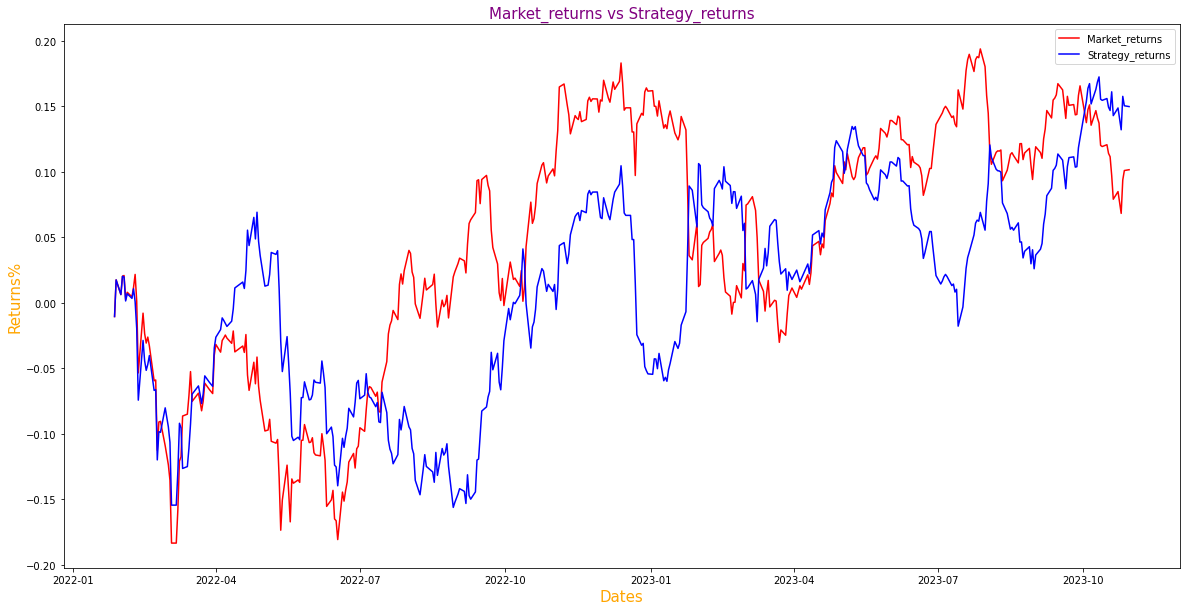

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(trade_price['Cumulative Market Returns'], color = 'r', label = 'Market_returns')
plt.plot(trade_price['Cumulative Strategy Returns'], color = 'b', label = 'Strategy_returns')

plt.title('Market_returns vs Strategy_returns', color ='purple', size = 15)

plt.xlabel('Dates',{'color':'orange', 'fontsize':15})
plt.ylabel('Returns%',{'color':'orange', 'fontsize':15})

plt.legend()
plt.show()

In [28]:
print(f'{100 * trade_price["Cumulative Market Returns"].mean()}')

4.403636721947143


In [29]:
print(f'{100 * trade_price["Cumulative Strategy Returns"].mean()}')

0.9747846425320619


In [30]:
trade_price

,Open,High,Low,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred,Tomorrows Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns
Date,,,,,,,,,,,,,,,,,,,
2022-01-27,486.361090,512.729181,486.023061,510.894073,35409230,26.706120,24.532984,486.634745,491.571906,467.415636,12.653510,68.754068,-4.433988,0,True,-0.010453,-0.010453,-0.010453,-0.010453
2022-01-28,515.771615,518.089713,503.601746,505.581757,24715250,14.487967,-10.189858,495.086070,493.378076,468.837069,13.892162,63.670820,-26.756233,1,True,0.027975,0.027975,0.017522,0.017522
2022-01-31,510.942337,522.436149,509.058890,519.924866,28674232,13.377259,8.982528,504.519338,494.546771,470.198937,16.188608,70.333150,-4.915001,0,True,-0.011209,-0.011209,0.006313,0.006313
2022-02-01,525.381983,525.381983,502.249518,514.129639,32245356,23.132466,-11.252345,512.133565,497.439536,472.468718,8.683419,64.921396,-20.822216,1,True,0.013992,0.013992,0.020305,0.020305
2022-02-02,518.331219,525.671766,513.212090,521.373657,21661864,12.459676,3.042438,513.212087,499.207065,475.144162,6.505387,68.346412,-7.911133,1,False,0.000556,-0.000556,0.020860,0.019749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624,7.200012,-2.399963,562.416667,575.420007,587.633337,8.766032,26.615323,-82.037962,0,True,-0.016679,-0.016679,0.068287,0.132118
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825,9.700012,-4.450012,557.416667,571.875006,586.725004,9.353501,21.744781,-89.659897,1,True,0.025539,0.025539,0.093826,0.157658
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296,12.500000,11.150024,552.050008,567.740009,585.235004,6.466120,40.564489,-50.207994,1,False,0.007191,-0.007191,0.101017,0.150466
